In [2]:
import numpy as np
import pandas as pd

from scipy import stats # more style :)

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

In [3]:
nod = pd.read_csv('nod_2020-05-17.csv')
nod.head()

,group,fio,contest_login,hse_mail,alt_mail,a1_coursera,a2_coursera,b_coursera,coursera,d1a,...,d3b,d3c,d3,k3a,k3b,k3c,k3,nakop,total,final
0,БЭК181,Аверьянов Николай Егорович,eds_python_2020_1,neaveryanov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.520000,5.0
1,БЭК181,Алиев Эльнур Гашимович,eds_python_2020_2,egaliev_1@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.840000,4.0
2,БЭК181,Алтунина Анастасия Игоревна,eds_python_2020_3,aialtunina@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.140000,4.0
3,БЭК181,Байкалова Дарья Александровна,eds_python_2020_4,dabaykalova@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,4.0
4,БЭК181,Васьков Алексей Васильевич,eds_python_2020_5,avvaskov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.566667,4.0


In [4]:
nod.columns

Index(['group', 'fio', 'contest_login', 'hse_mail', 'alt_mail', 'a1_coursera',
       'a2_coursera', 'b_coursera', 'coursera', 'd1a', 'd1b', 'd1c', 'd1d',
       'd1e', 'd1f', 'd1prel', 'd1fraud', 'd1', 'k1a', 'k1b', 'k1c', 'k1d',
       'k1e', 'k1f', 'k1f.1', 'k1prel', 'k1', 'd2a', 'd2b', 'd2c', 'd2', 'k2a',
       'k2b', 'k2c', 'k2', 'd3a', 'd3b', 'd3c', 'd3', 'k3a', 'k3b', 'k3c',
       'k3', 'nakop', 'total', 'final'],
      dtype='object')

In [5]:
nod.dropna(subset=["k1"], inplace=True)

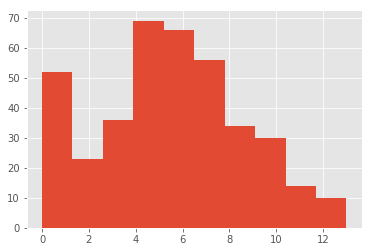

In [6]:
nod.k1.hist()

In [7]:
alpha = 0.05

# https://docs.scipy.org/doc/scipy/reference/stats.html
norm_rv = stats.norm( )
z = norm_rv.ppf(1 - alpha/2)
z

1.959963984540054

In [8]:
x = nod.k1.values

left = x.mean() - z * np.sqrt(x.var()/x.size)
right = x.mean() + z * np.sqrt(x.var()/x.size)

print(f"Доверительный интервал [{left:.3};{right:.3}] ширины {right - left:.3}")

Доверительный интервал [5.12;5.75] ширины 0.628


In [9]:
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/x.size)

In [10]:
# при такой записи 0.95 это 1 - alpha
stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat)

(5.117082820375691, 5.745481282188411)

In [30]:


def norm_conf_int(alpha, mu_hat, sd_hat, margin=1):
    plt.figure(figsize = (10, 5))
    norm_rv = stats.norm(loc=mu_hat, scale=sd_hat)

    x = np.linspace(-margin + mu_hat, margin + mu_hat, 100)
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf)
    plt.ylabel("$f(x)$", fontsize=18)
    plt.xlabel("$x$", fontsize=18)
    y_max = plt.ylim()[1]

    left,right = stats.norm.interval(1 - alpha, loc=mu_hat, scale=sd_hat)

    plt.axvline(left, color="blue", linestyle="--", lw=2)
    plt.text(left-0.2, 0.8*y_max, f"{left:.3}", color="blue", fontsize=16)
    xq = np.linspace(-margin + mu_hat, left)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.3)

    plt.axvline(right, color="blue", linestyle="--", lw=2)
    plt.text(right+0.05, 0.8*y_max, f"{right:.3}", color="blue", fontsize=16)
    xq = np.linspace(right, margin + mu_hat)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.3)
    return left, right

5.759633027522935 0.290784065745122


(5.189706731384368, 6.329559323661502)

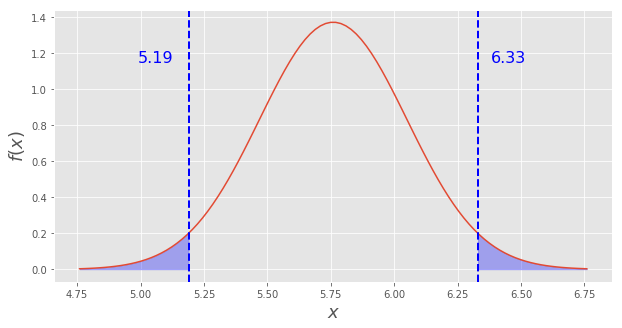

In [31]:
alpha = 0.05
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/x.size)
print(mu_hat,sd_hat)
norm_conf_int(alpha, mu_hat, sd_hat)

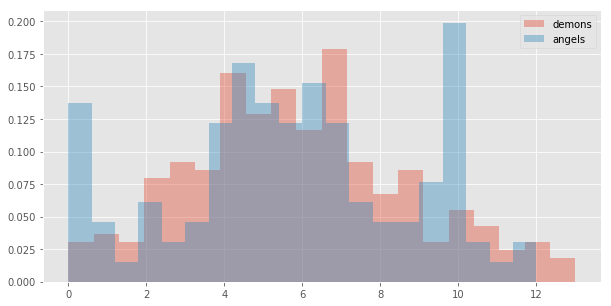

In [21]:
plt.figure(figsize = (10, 5))
nod[nod.d1fraud > 0].k1.hist(alpha=0.4, bins=20, density=True, label="demons")
nod[nod.d1fraud == 0].k1.hist(alpha=0.4, bins=20, density=True, label="angels")
plt.legend()

In [22]:
x = nod[nod.d1fraud == 0].k1.values
y = nod[nod.d1fraud > 0].k1.values

x.mean(), y.mean()

(5.759633027522935, 5.897600000000001)

(-0.8061568116880097, 0.5302228667338785)

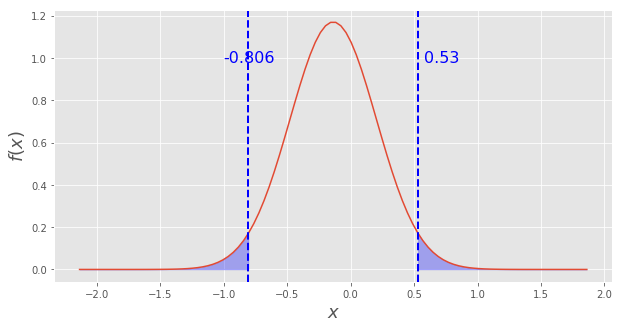

In [23]:
alpha = 0.05

diff = x.mean() - y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

norm_conf_int(alpha, diff, diff_sd, margin=2)

In [24]:
# Проверяем гипотезу!

# H_0:  mu = 5,  mu_0 = 5
# H_a:  mu != 5

# H_0: mu_a = mu_d   <=> mu_a - mu_d = 0, mu_0 = 0
# H_A: mu_a != mu_d

# наблюдаемое значение
z_obs = diff/diff_sd
z_obs

-0.4046908247368758

In [25]:
alpha = 0.05

norm_rv = stats.norm( )
z_crit = norm_rv.ppf(1 - alpha/2)
z_crit

1.959963984540054

In [47]:
def norm_mean_test(mu_hat, sd_hat, mu_0 = 0, alpha=0.05, margin=3):
    
    z_obs = mu_hat/sd_hat
    z_crit = stats.norm( ).ppf(1 - alpha/2)
    
    print(z_obs, z_crit)

    plt.figure(figsize = (10, 5))

    x = np.linspace(-margin, margin, 100)
    pdf = norm_rv.pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=18)
    plt.xlabel("$x$", fontsize=18)
    y_max = plt.ylim()[1]

    # Критические значения статистки 
    plt.axvline(-z_crit, color="blue", linestyle="--", lw=2)
    plt.text(-z_crit-0.7, 0.8*y_max, f"{-z_crit:.3}", color="blue", fontsize=16)
    xq = np.linspace(-margin, -z_crit)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.2)

    plt.axvline(z_crit, color="blue", linestyle="--", lw=2)
    plt.text(z_crit+0.05, 0.8*y_max, f"{z_crit:.3}", color="blue", fontsize=16)
    xq = np.linspace(z_crit, margin)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="blue", alpha=0.2)

    # Наблюдаемые значения статистики
    plt.axvline(-z_obs, color="red", linestyle="--", lw=2)
    plt.text(-z_obs-0.7, 0.8*y_max, f"{-z_obs:.3}", color="red", fontsize=16)
    xq = np.linspace(-margin, -z_obs)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="red", alpha=0.2)

    plt.axvline(z_obs, color="red", linestyle="--", lw=2)
    plt.text(z_obs+0.05, 0.8*y_max, f"{z_obs:.3}", color="red", fontsize=16)
    xq = np.linspace(z_obs, margin)
    yq = norm_rv.pdf(xq)
    plt.fill_between(xq, 0, yq, color="red", alpha=0.2)

    pvalue = 2*norm_rv.cdf(-z_obs)
    return pvalue

-0.13796697247706557 0.3409194477457445
-0.4046908247368758 1.959963984540054


1.3142952126199199

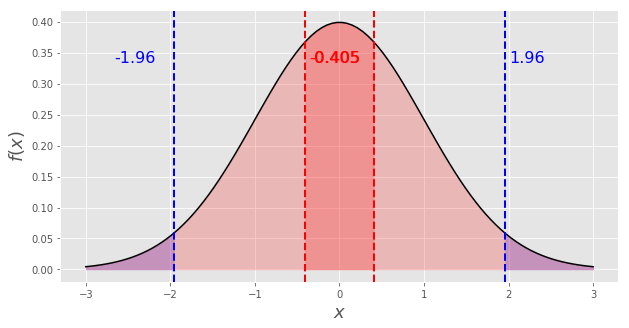

In [48]:
x = nod[nod.d1fraud == 0].k1.values
y = nod[nod.d1fraud > 0].k1.values

diff = x.mean() - y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)
print(diff,diff_sd)
norm_mean_test(diff, diff_sd)